In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression

In [2]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [3]:
stock_market.columns.unique()

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [4]:
stock_market.to_csv('dataset_stock.csv', index=False)

# Задание 1

In [5]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)

In [6]:
stock_market['Date'].dtype

dtype('<M8[ns]')

In [7]:
filtered_data = stock_market[(stock_market['Date'] >= '2019-01-01') & (stock_market['Date'] <= '2021-12-31')]

In [8]:
filtered_data['Bitcoin_Price'] = filtered_data['Bitcoin_Price'].str.replace(',', '').astype(float)
filtered_data['Ethereum_Price'] = filtered_data['Ethereum_Price'].str.replace(',', '').astype(float)

C:\Users\artfo\AppData\Local\Temp\ipykernel_10960\2611963543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bitcoin_Price'] = filtered_data['Bitcoin_Price'].str.replace(',', '').astype(float)
C:\Users\artfo\AppData\Local\Temp\ipykernel_10960\2611963543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ethereum_Price'] = filtered_data['Ethereum_Price'].str.replace(',', '').astype(float)


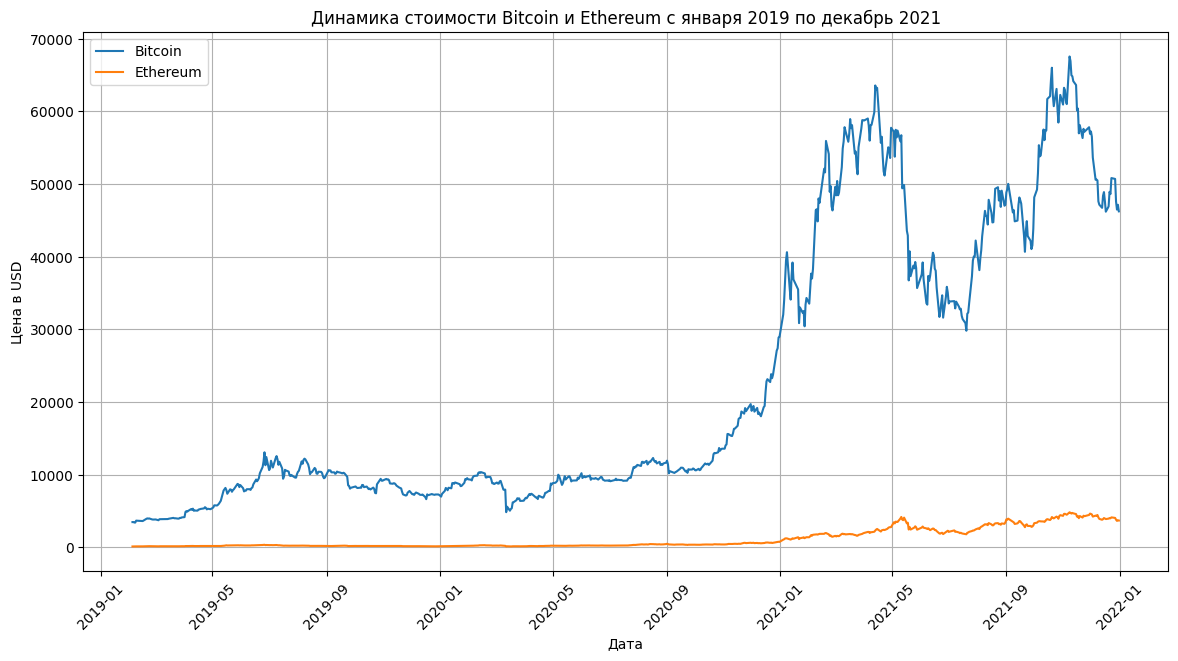

In [9]:
plt.figure(figsize=(14, 7))

# БИток
sns.lineplot(x='Date', y='Bitcoin_Price', data=filtered_data, label='Bitcoin')
# Эфир
sns.lineplot(x='Date', y='Ethereum_Price', data=filtered_data, label='Ethereum')

plt.title('Динамика стоимости Bitcoin и Ethereum с января 2019 по декабрь 2021')
plt.xlabel('Дата')
plt.ylabel('Цена в USD')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

# Задание 2

In [10]:
def convert_to_float(column):
    try:
        return column.str.replace(',', '').astype(float)
    except AttributeError:  # Если столбец уже в числовом формате
        return column.astype(float)

In [11]:
for col in ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']:
    stock_market[col] = convert_to_float(stock_market[col])

In [12]:
base_values = stock_market.loc[stock_market['Date'] == pd.to_datetime('2019-02-04'), ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']].iloc[0]

In [13]:
relative_prices = stock_market[['Date', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']].copy()

In [14]:
for col in ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']:
    relative_prices[col] = stock_market[col] / base_values[col]

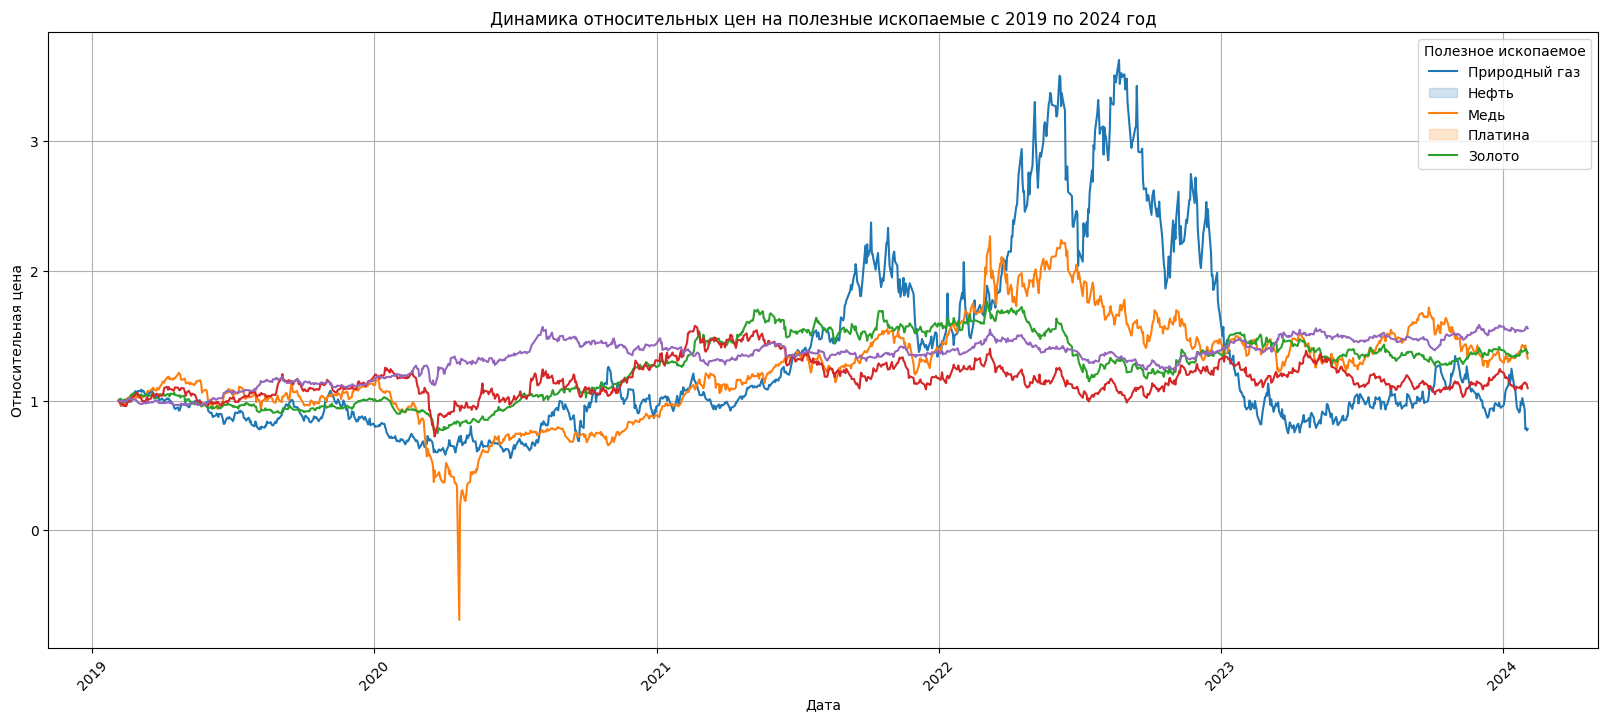

In [15]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(relative_prices, ['Date']), palette='tab10')

plt.title('Динамика относительных цен на полезные ископаемые с 2019 по 2024 год')
plt.xlabel('Дата')
plt.ylabel('Относительная цена')
plt.xticks(rotation=45)
plt.legend(title='Полезное ископаемое', labels=['Природный газ', 'Нефть', 'Медь', 'Платина', 'Золото'])
plt.grid(True)

plt.show()

# Задание 3.1

In [16]:
def sum_series(*args):
    sum = args[0]  # Инициализация суммы первым аргументом
    for series in args[1:]:  # Перебор оставшихся аргументов
        sum += series
    return sum

In [17]:
stock_market['FAANG'] = stock_market.apply(lambda row: sum_series(row['Meta_Price'], row['Amazon_Price'], row['Apple_Price'], row['Netflix_Price'], row['Google_Price']), axis=1)

In [18]:
stock_market.sample(8)

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,FAANG
959,2020-03-19,1.654,189480.0,25.22,136720.0,2.1855,101070.0,"6,172.00",2180000.0,595.2,...,1120.0,332.03,10620000.0,94.05,208000000.0,153.13,39860000.0,1479.3,325290.0,695.99
499,2022-01-31,4.874,156750.0,88.15,359080.0,4.3265,170.0,"38,498.60",61270.0,1019.9,...,2580.0,427.14,20050000.0,149.57,78310000.0,313.26,21580000.0,1796.4,139420.0,1200.05
798,2020-11-10,2.949,158190.0,41.36,457050.0,3.1595,150.0,"15,303.60",93360.0,896.3,...,620.0,480.24,8310000.0,151.75,131820000.0,272.43,29070000.0,1876.4,264870.0,1107.28
605,2021-08-25,3.897,39370.0,68.36,353740.0,4.2700,560.0,"48,994.50",63540.0,996.5,...,830.0,547.58,2070000.0,164.96,33610000.0,368.39,9680000.0,1791.0,163460.0,1371.37
657,2021-06-10,3.149,151570.0,70.29,492460.0,4.4890,300.0,"36,649.40",154320.0,1150.1,...,1350.0,487.27,4380000.0,167.48,69530000.0,332.46,13240000.0,1896.4,250550.0,1235.08
1173,2019-05-14,2.659,92880.0,61.78,751670.0,2.7250,62620.0,"7,994.60",1330000.0,859.7,...,310.0,345.61,5350000.0,92.01,92580000.0,180.73,17630000.0,1296.3,222050.0,721.75
1227,2019-02-26,2.855,14320.0,55.50,538920.0,2.9480,930.0,"3,810.30",2090000.0,863.1,...,180.0,364.97,4940000.0,81.82,53320000.0,164.13,13780000.0,1328.5,185560.0,710.60
353,2022-09-07,7.842,127190.0,81.94,380780.0,3.4265,4310.0,"19,281.50",319100.0,848.6,...,2120.0,228.96,8150000.0,129.48,47830000.0,160.39,16780000.0,1727.8,173620.0,784.24


# Задание 3.2

In [19]:
base_values_faang = stock_market.loc[stock_market['Date'] == pd.to_datetime('2019-02-04'), ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']].iloc[0]

In [20]:
for col in ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']:
    stock_market[col + '_relative'] = stock_market[col] / base_values_faang[col]

In [21]:
# Расчет значений для FAANG
stock_market['FAANG_relative'] = stock_market[['Meta_Price_relative', 'Amazon_Price_relative', 'Apple_Price_relative', 'Netflix_Price_relative', 'Google_Price_relative']].sum(axis=1) / 5

In [22]:
relative_prices_faang = stock_market[['Date', 'Meta_Price_relative', 'Amazon_Price_relative', 'Apple_Price_relative', 'Netflix_Price_relative', 'Google_Price_relative', 'FAANG_relative']]

In [23]:
relative_prices_faang.tail()

,Date,Meta_Price_relative,Amazon_Price_relative,Apple_Price_relative,Netflix_Price_relative,Google_Price_relative,FAANG_relative
1238,2019-02-08,0.988656,0.972328,0.995095,0.989270,0.965831,0.982236
1239,2019-02-07,0.983043,0.988368,0.998131,0.981129,0.968985,0.983931
1240,2019-02-06,1.007326,1.004163,1.017519,1.002419,0.983704,1.003026
1241,2019-02-05,1.011285,1.015550,1.017286,1.012723,1.009112,1.013191
1242,2019-02-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


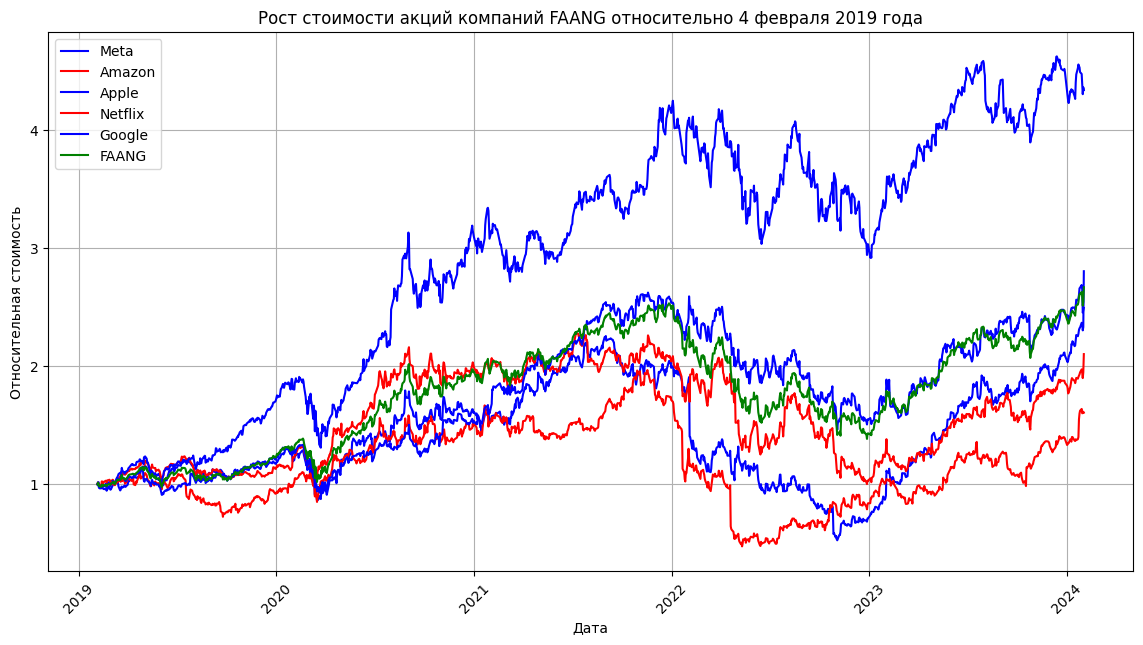

In [24]:
plt.figure(figsize=(14, 7))

# Построение графиков для каждой компании
colors = {'Meta_Price_relative': 'blue', 'Amazon_Price_relative': 'red', 'Apple_Price_relative': 'blue', 'Netflix_Price_relative': 'red', 'Google_Price_relative': 'blue', 'FAANG_relative': 'green'}
for col in relative_prices_faang.columns[1:]:
    sns.lineplot(x='Date', y=col, data=relative_prices_faang, label=col.split('_')[0], color=colors[col])

plt.title('Рост стоимости акций компаний FAANG относительно 4 февраля 2019 года')
plt.xlabel('Дата')
plt.ylabel('Относительная стоимость')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

# Задание 3.3

In [25]:
# Относительные цены для ПО
base_values_resources = stock_market.loc[stock_market['Date'] == pd.to_datetime('2019-02-04'), ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']].iloc[0]
resource_columns = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']
for col in resource_columns:
    stock_market[col + '_relative'] = stock_market[col] / base_values_resources[col]

# среднее
stock_market['Resources_Avg_relative'] = stock_market[[col + '_relative' for col in resource_columns]].mean(axis=1)

In [26]:
# Относительные цены для компаний
company_columns = ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']  # FAANG companies
for col in company_columns:
    stock_market[col + '_relative'] = stock_market[col] / base_values_faang[col]

# среднее для компаний (не только FFAANG)
stock_market['Companies_Avg_relative'] = stock_market[[col + '_relative' for col in company_columns]].mean(axis=1)

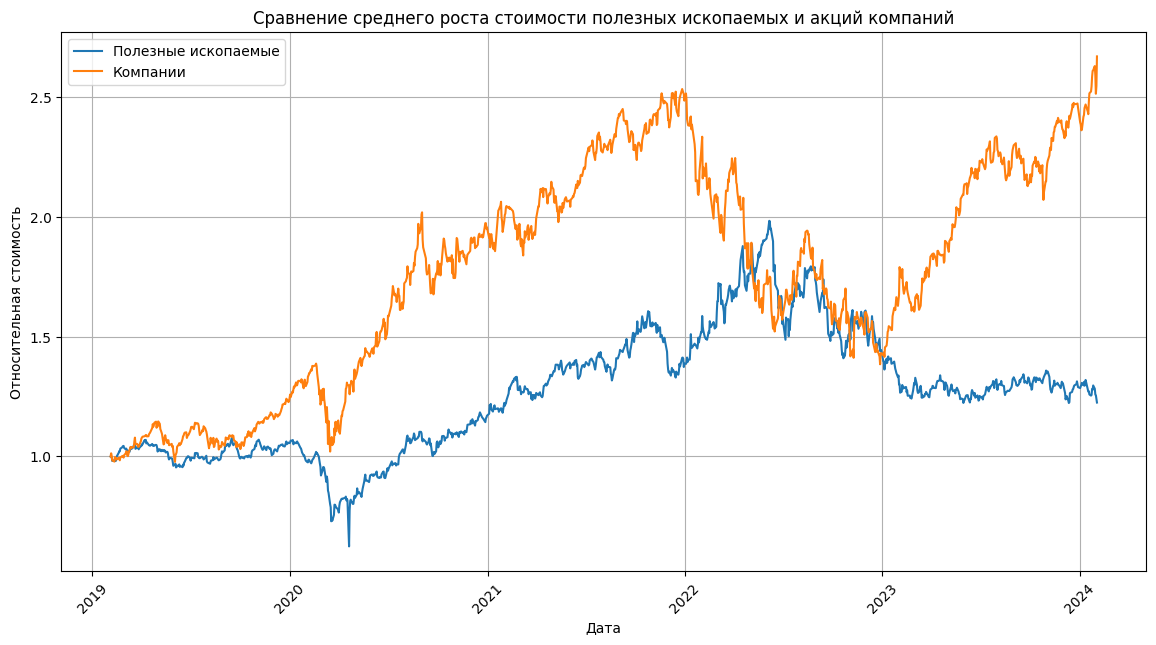

In [27]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Resources_Avg_relative', data=stock_market, label='Полезные ископаемые')
sns.lineplot(x='Date', y='Companies_Avg_relative', data=stock_market, label='Компании')

plt.title('Сравнение среднего роста стоимости полезных ископаемых и акций компаний')
plt.xlabel('Дата')
plt.ylabel('Относительная стоимость')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

## Вывод

Акции компаний показывали лучшую динамику в рассматриваемом периоде, и к началу 2024 году показывают в моменте почти двукратную разницу в стоимости активов по сравнению с полезными ископаемыми. <br><br>
Так что, отвечая на вопрос, вложение в акции было бы более выгодным решением, нежели в покупку полезных ископаемых.

# Задание 4.1

In [28]:
start_2019 = pd.to_datetime('2019-01-01')
start_2024 = pd.to_datetime('2024-01-01')

In [29]:
closest_start_2019 = stock_market[stock_market['Date'] >= start_2019].iloc[0]['Date']
closest_start_2024 = stock_market[stock_market['Date'] <= start_2024].iloc[-1]['Date']

In [30]:
prices_closest_start_2019 = stock_market.loc[stock_market['Date'] == closest_start_2019, company_columns].reset_index(drop=True)
prices_closest_start_2024 = stock_market.loc[stock_market['Date'] == closest_start_2024, company_columns].reset_index(drop=True)

In [31]:
# Проверка удвоения стоимости
doubling_companies = (prices_closest_start_2024.values > prices_closest_start_2019.values * 2).flatten()

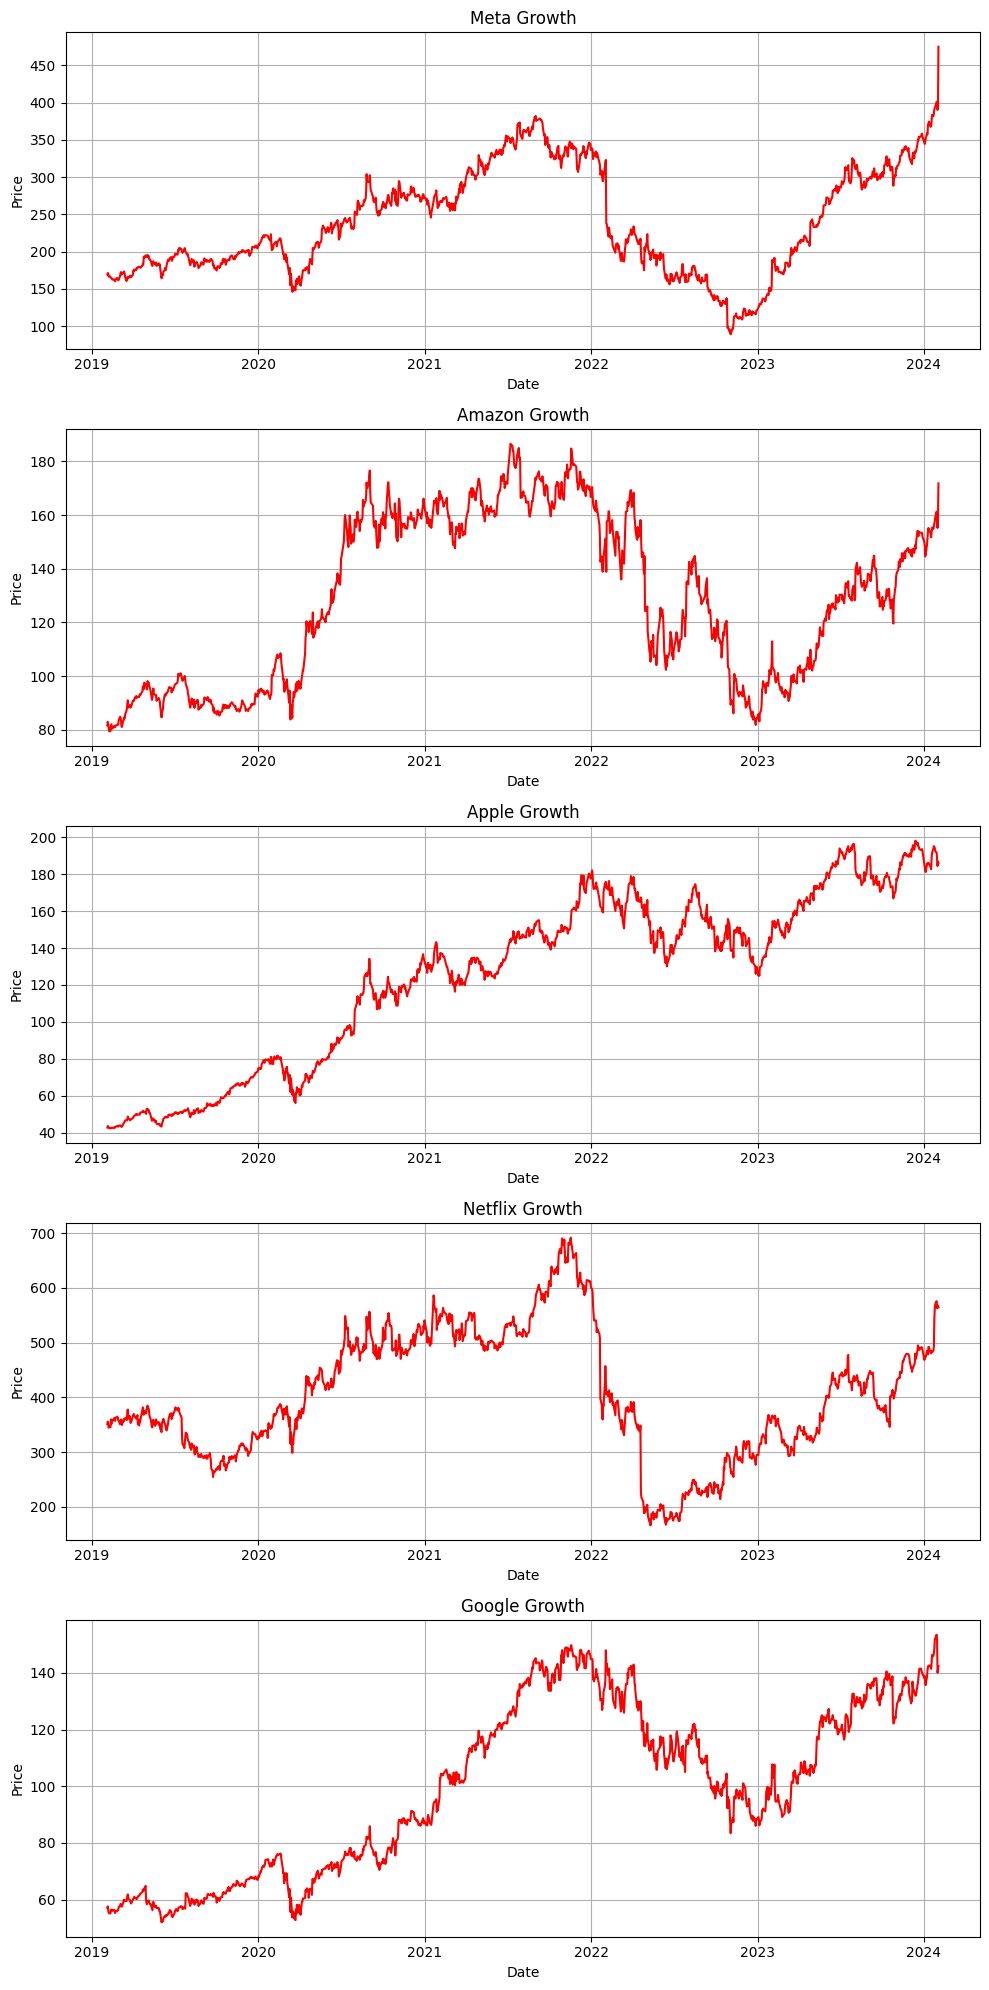

In [32]:
fig, axs = plt.subplots(len(company_columns), 1, figsize=(10, 20))

for i, col in enumerate(company_columns):
    color = 'green' if doubling_companies[i] else 'red'
    sns.lineplot(x='Date', y=col, data=stock_market, ax=axs[i], color=color)
    axs[i].set_title(f"{col.split('_')[0]} Growth")
    axs[i].set_ylabel('Price')
    axs[i].set_xlabel('Date')
    axs[i].grid()
plt.tight_layout()
plt.show()

# Задание 4.2

In [37]:
fig = go.Figure()

In [39]:
for company in company_columns:
    fig.add_trace(go.Scatter(x=stock_market['Date'], y=stock_market[company], name=company, visible=False))

In [40]:
buttons = []

for i, company in enumerate(company_columns):
    visibility = [False] * len(company_columns)
    visibility[i] = True  # Текущая компания видима, остальные скрыты
    
    button = dict(label=company,
                  method="update",
                  args=[{"visible": visibility},
                        {"title": f"Динамика стоимости акций: {company}"}])
    buttons.append(button)

In [ ]:
fig.data[0].visible = True
fig.update_layout(title_text=f"Динамика стоимости акций: {company_columns[0]}",
                  updatemenus=[dict(active=0,
                                    buttons=buttons,
                                    direction="down",
                                    pad={"r": 10, "t": 10},
                                    showactive=True,
                                    x=0.1,
                                    xanchor="left",
                                    y=1.1,
                                    yanchor="top")])

fig.update_xaxes(title_text='Дата')
fig.update_yaxes(title_text='Цена акции, USD')
fig.show()

Почему-то не получилоь вывести график здесь, прямо в юпитере, поэтому код ниже 👇 для запуска с помощью HTML, все открывается 👌

In [45]:
import plotly.offline as py_offline
py_offline.plot(fig, filename='hw_2_plotly.html', auto_open=True)

'hw_2_plotly.html'

# Задание 5

In [55]:
def plot_stock_price_vs_volume(company_name, data):
    # Prepare the data
    price_column = f'{company_name}_Price'
    volume_column = f'{company_name}_Vol.'
    
    # Clean data: remove commas and convert to numeric
    data[price_column] = data[price_column].replace(',', '', regex=True).astype(float)
    data = data.dropna(subset=[price_column, volume_column])
    
    # Extract the price and volume data for the regression
    x = data[volume_column].values.reshape(-1, 1)  # Volume
    y = data[price_column].values  # Price

    # Fit the regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Get the slope and intercept of the line
    beta_0 = model.intercept_
    beta_1 = model.coef_[0]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=volume_column, y=price_column, color='blue', alpha=0.6)
    
    # Add the regression line
    line_x = np.linspace(min(x), max(x), 100)
    line_y = beta_0 + beta_1 * line_x
    plt.plot(line_x, line_y, color='red', linewidth=2)
    
    # Annotate the plot with the regression equation
    equation_text = f'y = {beta_0:.2f} + {beta_1:.2e}X'
    plt.text(min(x), max(y), equation_text, fontsize=12, color='red')
    
    # Set plot title and labels
    plt.title(f'Stock Price vs. Volume for {company_name}')
    plt.xlabel('Volume')
    plt.ylabel('Price')

    # Show the plot
    plt.show()

    return beta_0, beta_1

Примеры применения функции

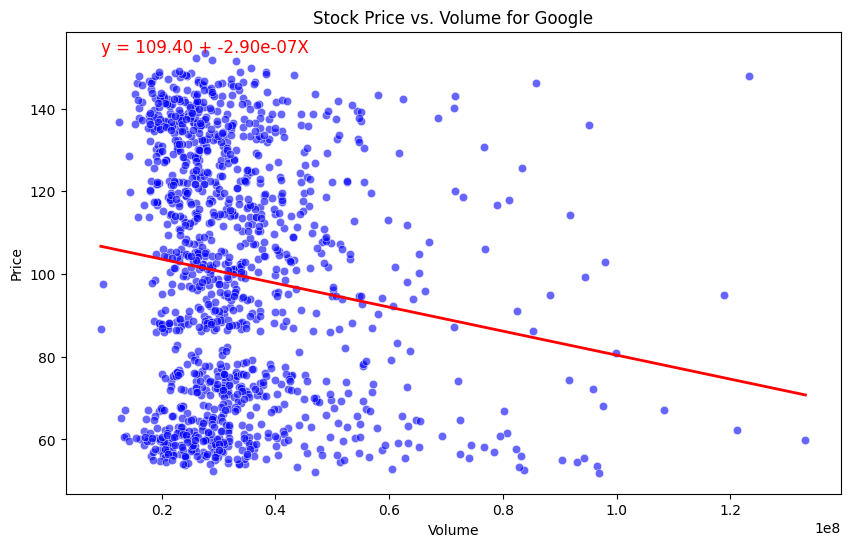

In [58]:
beta_0, beta_1 = plot_stock_price_vs_volume('Google', stock_market)

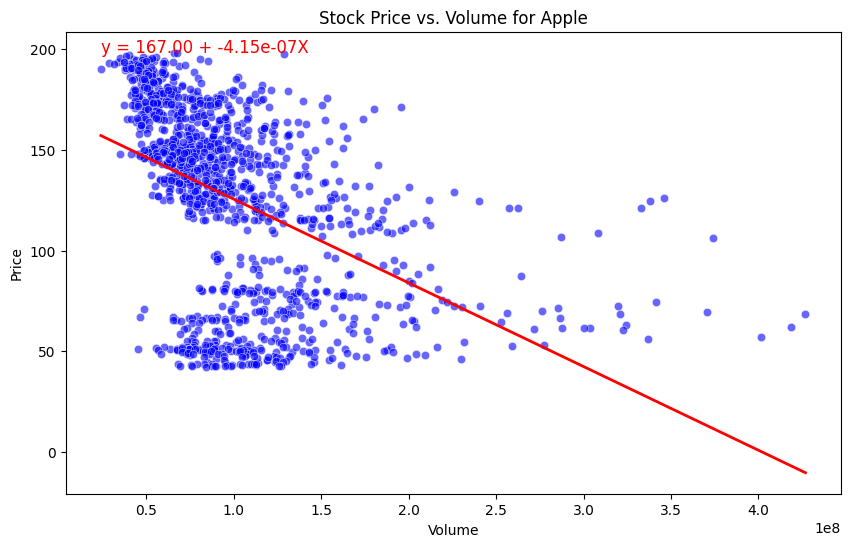

In [59]:
beta_0, beta_1 = plot_stock_price_vs_volume('Apple', stock_market)

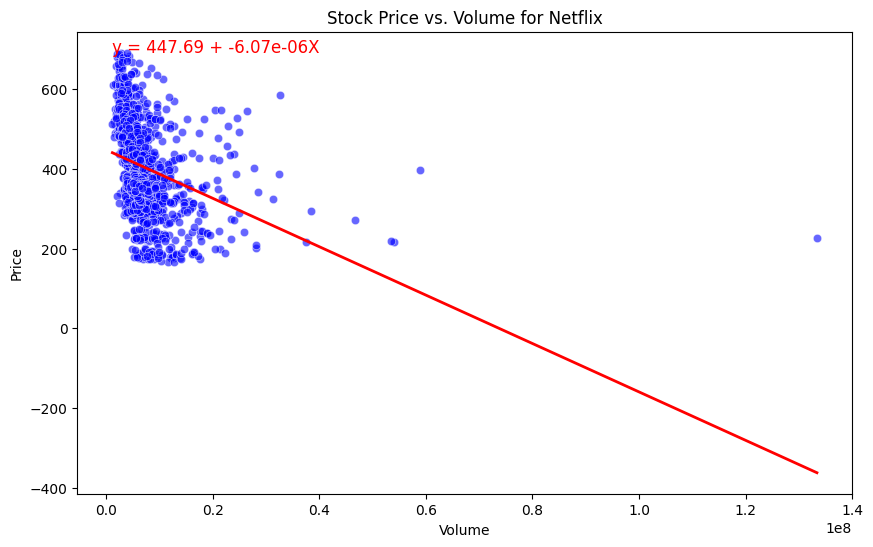

In [60]:
beta_0, beta_1 = plot_stock_price_vs_volume('Netflix', stock_market)

## Реализация через ООП

In [63]:
class StockVisualizer:
    def __init__(self, data):
        self.data = data
    
    def plot_company(self, company_name):
        # Prepare the data
        price_column = f'{company_name}_Price'
        volume_column = f'{company_name}_Vol.'
        
        # Clean data: remove commas and convert to numeric
        self.data[price_column] = self.data[price_column].replace(',', '', regex=True).astype(float)
        self.data = self.data.dropna(subset=[price_column, volume_column])
        
        # Extract the price and volume data for the regression
        x = self.data[volume_column].values.reshape(-1, 1)  # Volume
        y = self.data[price_column].values  # Price

        # Fit the regression model
        model = LinearRegression()
        model.fit(x, y)
        
        # Get the slope and intercept of the line
        beta_0 = model.intercept_
        beta_1 = model.coef_[0]
        
        # Create the scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.data, x=volume_column, y=price_column, color='blue', alpha=0.6)
        
        # Add the regression line
        line_x = np.linspace(min(x), max(x), 100)
        line_y = beta_0 + beta_1 * line_x
        plt.plot(line_x, line_y, color='red', linewidth=2)
        
        # Annotate the plot with the regression equation
        equation_text = f'y = {beta_0:.2f} + {beta_1:.2e}X'
        plt.text(min(x), max(y), equation_text, fontsize=12, color='red')
        
        # Set plot title and labels
        plt.title(f'Stock Price vs. Volume for {company_name}')
        plt.xlabel('Volume')
        plt.ylabel('Price')

        # Show the plot
        plt.show()

        return beta_0, beta_1

In [64]:
visualizer = StockVisualizer(stock_market)

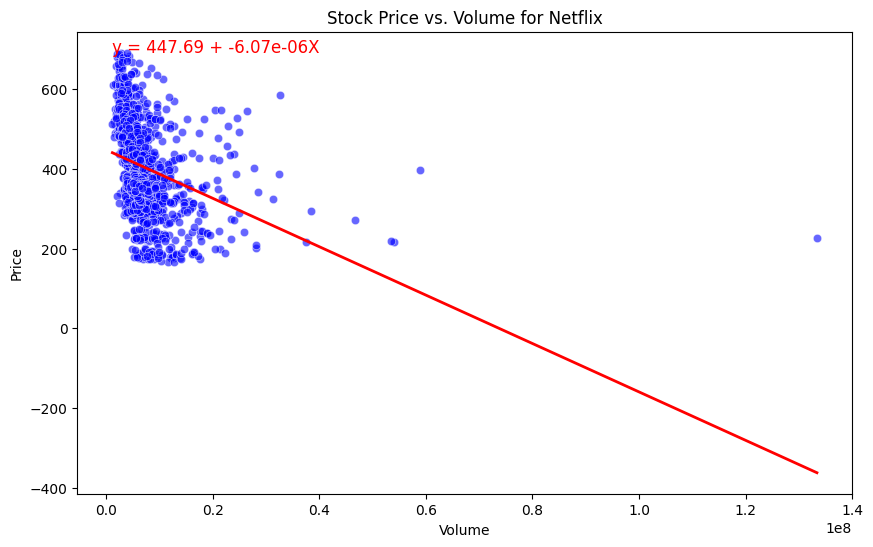

In [67]:
beta_0, beta_1 = visualizer.plot_company('Netflix')

In [69]:
beta_0, beta_1

(447.6936574962373, -6.072223095045559e-06)

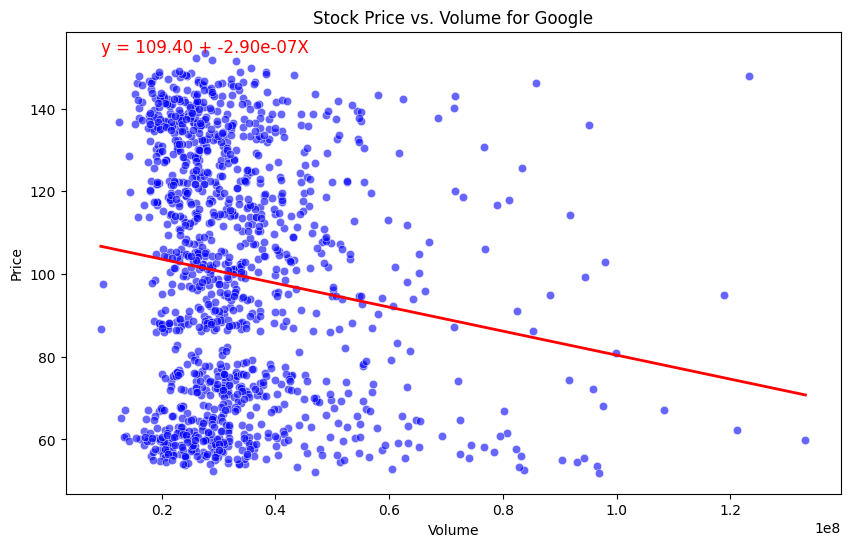

(109.39815043726315, -2.9022932329977137e-07)

In [70]:
visualizer.plot_company('Google')